In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime 
import matplotlib as mpl
import matplotlib.ticker as mticker
import math
from scipy.optimize import curve_fit
from matplotlib import cm
from scipy import stats


#first importing the data using pandas 
sc_compact = 'sc_compact_1995_2019_d.csv'
dataframe = pd.read_csv(sc_compact)

omni_file = 'omni_min_2012.csv'
dataframe_omni = pd.read_csv(omni_file)

#dataframe had no datetime column so I created one
dataframe['datetime'] = dataframe.year.astype(str).str.cat(dataframe.month.astype(str),sep='-').str.cat(dataframe.day.astype(str), sep='-').str.cat(dataframe.hour.astype(str),sep=',').str.cat(dataframe.minute.astype(str),sep=':')

#making column with just time without date for graph
dataframe_omni['time'] = dataframe_omni.hour.astype(str).str.cat(dataframe_omni.minute.astype(str),sep='-')

#seperate dataframes for each event which took place ranging from 30 minutes before to 30 minutes after
january22 = dataframe_omni[dataframe_omni.datetime.between('2012-01-22 05:39:00', '2012-01-22 06:41:00')]
january24 = dataframe_omni[dataframe_omni.datetime.between('2012-01-24 14:31:00', '2012-01-24 15:33:00')]
February26 = dataframe_omni[dataframe_omni.datetime.between('2012-02-26 21:08:00', '2012-02-26 22:10:00')]
march7 = dataframe_omni[dataframe_omni.datetime.between('2012-03-07 03:47:00', '2012-03-07 04:49:00')]
march8 = dataframe_omni[dataframe_omni.datetime.between('2012-03-08 10:31:00', '2012-03-08 11:33:00')]
march12 = dataframe_omni[dataframe_omni.datetime.between('2012-03-12 08:43:00', '2012-03-12 09:45:00')]
march15 = dataframe_omni[dataframe_omni.datetime.between('2012-03-15 12:35:00', '2012-03-15 13:37:00')]
april23 = dataframe_omni[dataframe_omni.datetime.between('2012-04-23 02:50:00', '2012-04-23 03:52:00')]
may21 = dataframe_omni[dataframe_omni.datetime.between('2012-05-21 19:05:00', '2012-05-21 20:07:00')]
june161 = dataframe_omni[dataframe_omni.datetime.between('2012-06-16 09:24:00 ', '2012-06-16 10:26:00')]
june162 = dataframe_omni[dataframe_omni.datetime.between('2012-06-16 19:47:00 ', '2012-06-16 20:49:00')]
june163 = dataframe_omni[dataframe_omni.datetime.between('2012-06-16 20:44:00 ', '2012-06-16 21:46:00')]
july14 = dataframe_omni[dataframe_omni.datetime.between('2012-07-14 17:40:00 ', '2012-07-14 18:42:00')]
july20 =  dataframe_omni[dataframe_omni.datetime.between('2012-07-20 04:16:00', '2012-07-20 05:18:00')]
july21= dataframe_omni[dataframe_omni.datetime.between('2012-07-21 15:34:00 ', '2012-07-21 16:36:00')]
september3= dataframe_omni[dataframe_omni.datetime.between('2012-09-03 11:42:00 ', '2012-09-03 12:44:00')]
september301 =  dataframe_omni[dataframe_omni.datetime.between('2012-09-30 11:00:00', '2012-09-30 12:02:00')]
september302 = dataframe_omni[dataframe_omni.datetime.between('2012-09-30 22:34:00', '2012-09-30 23:36:00')]
october31 =  dataframe_omni[dataframe_omni.datetime.between('2012-10-31 15:06:00', '2012-10-31 16:08:00')]
november12 = dataframe_omni[dataframe_omni.datetime.between('2012-11-12 22:39:00', '2012-11-12 23:41:00')]
november23 = dataframe_omni[dataframe_omni.datetime.between('2012-11-23 21:20:00', '2012-11-23 22:22:00')]





In [13]:
#making time series of one event March 12th 
pressure = march12['flow_pressure'].tolist()
time=march12["time"].tolist()
symh=march12["symh"].tolist()

sqrt_pressure = np.sqrt(pressure)

pressure1 = pressure[0:30]
pressure2 = pressure[31:60]

pressure1 = [item for item in pressure1 if not(math.isnan(item)) == True]
pressure2 =  [item for item in pressure2 if not(math.isnan(item)) == True]

med_sqrt_pressure1 = np.median(np.sqrt(pressure1))
med_sqrt_pressure2 = np.median(np.sqrt(pressure2))

change_pressure = med_sqrt_pressure2 - med_sqrt_pressure1

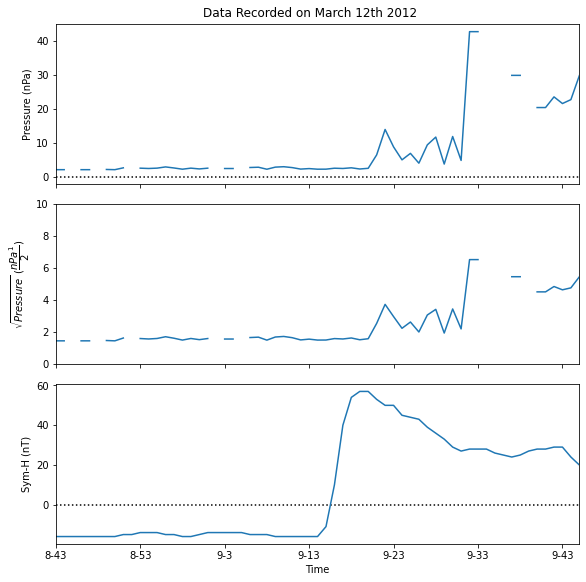

In [14]:
#making an eleven panel figure with each parameter 
fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=True)

#setting font sizes, heights and widths of each panel so the graph is clear
plt.rc('font', size=10)
plt.rc('axes', titlesize=8)
fig.set_figheight(8)
fig.set_figwidth(8)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

#to avoid overlap of the times on the x-axis, I am only displayign multiples of 10
myLocator = mticker.MultipleLocator(10)
ax1.xaxis.set_major_locator(myLocator)
ax2.xaxis.set_major_locator(myLocator)
ax3.xaxis.set_major_locator(myLocator)
    
#beggining to plot each with titles 
fig.suptitle('Data Recorded on March 12th 2012')
plt.xlabel('Time')

#plotting magnetic field in x,y,z directions 
ax1.plot(time,pressure)
ax1.set_ylabel('Pressure (nPa)')
ax1.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

#plotting flow pressure 
ax2.plot(time,sqrt_pressure)
ax2.set_ylabel('$\sqrt{Pressure}$ ($\dfrac{nPa^1}{2}$)')
ax2.set_ylim([0,10])
#plotting
ax3.plot(time,symh)
ax3.set_ylabel('Sym-H (nT)')
ax3.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

In [15]:
#getting amplitude 
sc_2012 = dataframe[dataframe.datetime.between('2012', '2013')]
amplitude = sc_2012['average_amplitude'].tolist()


pressure1 = january22['flow_pressure'].tolist()
pressure2 = january24['flow_pressure'].tolist()
pressure3 = February26['flow_pressure'].tolist()
pressure4 = march7['flow_pressure'].tolist()
pressure5 = march8['flow_pressure'].tolist()
pressure6 = march12['flow_pressure'].tolist()
pressure7 = march15['flow_pressure'].tolist()
pressure8 = april23['flow_pressure'].tolist()
pressure9 = may21['flow_pressure'].tolist()
pressure10 = june161['flow_pressure'].tolist()
pressure11=june162['flow_pressure'].tolist()
pressure12 = june163['flow_pressure'].tolist()
pressure13 = july14['flow_pressure'].tolist()
pressure14 = july20['flow_pressure'].tolist()
pressure15 = july21['flow_pressure'].tolist()
pressure16 = september3['flow_pressure'].tolist()
pressure17 = september301['flow_pressure'].tolist()
pressure18 = september302['flow_pressure'].tolist()
pressure19 = october31['flow_pressure'].tolist()
pressure20 = november12['flow_pressure'].tolist()
pressure21 = november23['flow_pressure'].tolist()

a1 = pressure1[0:30] 
a2 = pressure2[0:30] 
a3 = pressure3[0:30] 
a4 = pressure4[0:30] 
a5= pressure5[0:30] 
a6= pressure6[0:30] 
a7= pressure7[0:30] 
a8= pressure8[0:30] 
a9= pressure9[0:30] 
a10= pressure10[0:30] 
a11= pressure11[0:30] 
a12= pressure12[0:30] 
a13= pressure13[0:30] 
a14= pressure14[0:30] 
a15= pressure15[0:30] 
a16= pressure16[0:30] 
a17= pressure17[0:30] 
a18= pressure18[0:30] 
a19= pressure19[0:30] 
a20= pressure20[0:30] 
a21= pressure21[0:30] 


b1 = pressure1[31:60]
b2 = pressure2[31:60]
b3 = pressure3[31:60]
b4 = pressure4[31:60]
b5= pressure5[31:60]
b6= pressure6[31:60]
b7= pressure7[31:60]
b8= pressure8[31:60]
b9= pressure9[31:60]
b10= pressure10[31:60]
b11= pressure11[31:60]
b12= pressure12[31:60]
b13= pressure13[31:60]
b14= pressure14[31:60]
b15=pressure15[31:60]
b16= pressure16[31:60]
b17= pressure17[31:60]
b18= pressure18[31:60]
b19= pressure19[31:60]
b20= pressure20[31:60]
b21= pressure21[31:60]

a1 = [item for item in a1 if not(math.isnan(item)) == True]
a2 = [item for item in a2 if not(math.isnan(item)) == True]
a3 = [item for item in a3 if not(math.isnan(item)) == True]
a4 = [item for item in a4 if not(math.isnan(item)) == True]
a5 = [item for item in a5 if not(math.isnan(item)) == True]
a6 = [item for item in a6 if not(math.isnan(item)) == True]
a7 = [item for item in a7 if not(math.isnan(item)) == True]
a8 = [item for item in a8 if not(math.isnan(item)) == True]
a9 = [item for item in a9 if not(math.isnan(item)) == True]
a10 = [item for item in a10 if not(math.isnan(item)) == True]
a11 = [item for item in a11 if not(math.isnan(item)) == True]
a12 = [item for item in a12 if not(math.isnan(item)) == True]
a13 = [item for item in a13 if not(math.isnan(item)) == True]
a14 = [item for item in a14 if not(math.isnan(item)) == True]
a15 = [item for item in a15 if not(math.isnan(item)) == True]
a16 = [item for item in a16 if not(math.isnan(item)) == True]
a17 = [item for item in a17 if not(math.isnan(item)) == True]
a18 = [item for item in a18 if not(math.isnan(item)) == True]
a19 = [item for item in a19 if not(math.isnan(item)) == True]
a20 = [item for item in a20 if not(math.isnan(item)) == True]
a21 = [item for item in a21 if not(math.isnan(item)) == True]

b1 = [item for item in b1 if not(math.isnan(item)) == True]
b2 = [item for item in b2 if not(math.isnan(item)) == True]
b3 = [item for item in b3 if not(math.isnan(item)) == True]
b4 = [item for item in b4 if not(math.isnan(item)) == True]
b5 = [item for item in b5 if not(math.isnan(item)) == True]
b6 = [item for item in b6 if not(math.isnan(item)) == True]
b7 = [item for item in b7 if not(math.isnan(item)) == True]
b8 = [item for item in b8 if not(math.isnan(item)) == True]
b9 = [item for item in b9 if not(math.isnan(item)) == True]
b10= [item for item in b10 if not(math.isnan(item)) == True]
b11= [item for item in b11 if not(math.isnan(item)) == True]
b12= [item for item in b12 if not(math.isnan(item)) == True]
b13 = [item for item in b13 if not(math.isnan(item)) == True]
b14 = [item for item in b14 if not(math.isnan(item)) == True]
b15 = [item for item in b15 if not(math.isnan(item)) == True]
b16 = [item for item in b16 if not(math.isnan(item)) == True]
b17 = [item for item in b17 if not(math.isnan(item)) == True]
b18 = [item for item in b18 if not(math.isnan(item)) == True]
b19 = [item for item in b19 if not(math.isnan(item)) == True]
b20 = [item for item in b20 if not(math.isnan(item)) == True]
b21 = [item for item in b21 if not(math.isnan(item)) == True]

med_sqrt1 = np.median(np.sqrt(a1))
med_sqrt2 = np.median(np.sqrt(a2))
med_sqrt3 = np.median(np.sqrt(a3))
med_sqrt4 = np.median(np.sqrt(a4))
med_sqrt5 = np.median(np.sqrt(a5))
med_sqrt6 = np.median(np.sqrt(a6))
med_sqrt7 = np.median(np.sqrt(a7))
med_sqrt8 = np.median(np.sqrt(a8))
med_sqrt9 = np.median(np.sqrt(a9))
med_sqrt10 = np.median(np.sqrt(a10))
med_sqrt11 = np.median(np.sqrt(a11))
med_sqrt12 = np.median(np.sqrt(a12))
med_sqrt13 = np.median(np.sqrt(a13))
med_sqrt14 = np.median(np.sqrt(a14))
med_sqrt15 = np.median(np.sqrt(a15))
med_sqrt16 = np.median(np.sqrt(a16))
med_sqrt17 = np.median(np.sqrt(a17))
med_sqrt18 = np.median(np.sqrt(a18))
med_sqrt19 = np.median(np.sqrt(a19))
med_sqrt20 = np.median(np.sqrt(a20))
med_sqrt21 = np.median(np.sqrt(a21))

med_sqrt1b = np.median(np.sqrt(b1))
med_sqrt2b= np.median(np.sqrt(b2))
med_sqrt3b= np.median(np.sqrt(b3))
med_sqrt4b = np.median(np.sqrt(b4))
med_sqrt5b = np.median(np.sqrt(b5))
med_sqrt6b = np.median(np.sqrt(b6))
med_sqrt7b = np.median(np.sqrt(b7))
med_sqrt8b = np.median(np.sqrt(b8))
med_sqrt9b = np.median(np.sqrt(b9))
med_sqrt10b = np.median(np.sqrt(b10))
med_sqrt11b = np.median(np.sqrt(b11))
med_sqrt12b = np.median(np.sqrt(b12))
med_sqrt13b = np.median(np.sqrt(b13))
med_sqrt14b = np.median(np.sqrt(b14))
med_sqrt15b = np.median(np.sqrt(b15))
med_sqrt16b = np.median(np.sqrt(b16))
med_sqrt17b = np.median(np.sqrt(b17))
med_sqrt18b = np.median(np.sqrt(b18))
med_sqrt19b = np.median(np.sqrt(b19))
med_sqrt20b = np.median(np.sqrt(b20))
med_sqrt21b = np.median(np.sqrt(b21))



#removed the data from change 4 and 10 because they were NANs
change1 = med_sqrt1b - med_sqrt1
change2 = med_sqrt2b - med_sqrt2
change3 = med_sqrt3b - med_sqrt3
#change4 = med_sqrt4b 
#change5 = med_sqrt5b - med_sqrt5
change6 = med_sqrt6b - med_sqrt6
change7 = med_sqrt7b - med_sqrt7
change8 = med_sqrt8b - med_sqrt8
change9 = med_sqrt9b - med_sqrt9
#change10 = med_sqrt10b 
#change11 = med_sqrt11b - med_sqrt11
change12 = med_sqrt12b - med_sqrt12
change13 = med_sqrt13b - med_sqrt13
change14 = med_sqrt14b - med_sqrt14
change15 = med_sqrt15b - med_sqrt15
#change16 = med_sqrt16b - med_sqrt16
change17 = med_sqrt17b - med_sqrt17
change18 = med_sqrt18b - med_sqrt18
change19 = med_sqrt19b - med_sqrt19
change20 = med_sqrt20b - med_sqrt20
change21 = med_sqrt21b - med_sqrt21

changes = [change1, change2, change3, change6, change7, change8, change9, change12, change13, change14, change15, change17 ,change18 ,change19, change20,change21]
changes.sort()
print(changes)


[0.2762716741354483, 0.4710446302966731, 0.6434530850314089, 0.6438189482849768, 0.7154546187578488, 0.8838495695685087, 0.9099867562225157, 0.9329224881799062, 0.9628208638938838, 1.0409847700023342, 1.0628310145000064, 1.0677166628233836, 1.1258747805195983, 1.2748265307306408, 1.47797206493537, 1.8439196093772843]


/Users/lilyrooney/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lilyrooney/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
#getting the average durations
duration = sc_2012['average_duration'].tolist()

#finding percentage of NaNs in Flow pressure for each event
for dataframe in (january22, january24, February26, march7, march8, march12, march15, april23, may21, june161, june162, june163, july14, july20, july21, september3, september301, september302, october31, november12, november23): 
    nan = round(dataframe.isnull().sum()/ len(dataframe), 2)
    print(nan.flow_pressure)
nans = nan.flow_pressure.tolist()
print(nans)
num = 1-nans 
print(num)

#removing values where the NaN is <25%
duration.remove(6.0)
duration.remove(4.2)
duration.remove(5.4)
duration.remove(2.8)
duration.pop(12)
print(duration)

#removing values where the NaN is <25%
print(amplitude)
amplitude.remove(13.560000000000002)
amplitude.remove(48.82)
amplitude.remove(19.8)
amplitude.remove(31.28)
amplitude.remove(22.6)
myorder= [10,2,6,15,7,11,13,0,9,4,3,5,12,8,14,1]
amplitude = [amplitude[i] for i in myorder]
print(amplitude)
duration = [duration[i] for i in myorder]

0.08
0.13
0.16
0.68
0.37
0.14
0.05
0.06
0.22
0.66
0.26
0.03
0.18
0.24
0.16
0.55
0.16
0.08
0.0
0.05
0.17
0.17
0.83
[6.2, 4.8, 4.6, 5.0, 3.4, 6.6, 5.2, 2.6, 3.6, 7.2, 5.4, 4.8, 4.4, 5.6, 4.6, 5.8]
[29.880000000000003, 44.68000000000001, 16.9, 13.560000000000002, 48.82, 51.86, 25.6, 24.04, 22.08, 19.8, 22.6, 27.28, 41.06, 22.6, 13.34, 31.28, 17.1, 16.16, 23.2, 18.94, 20.74]
[13.34, 16.9, 22.08, 20.74, 27.28, 17.1, 23.2, 29.880000000000003, 22.6, 25.6, 51.86, 24.04, 16.16, 41.06, 18.94, 44.68000000000001]


[4.29, 6.78, 1.3850000000000002, 4.449999999999999, 4.86, 4.375, 1.8699999999999999, 5.785, 4.25, 2.66, 0.7850000000000001, 3.3549999999999995, 4.46, 3.1799999999999997, 7.2700000000000005, 1.7099999999999997]


<function matplotlib.pyplot.show(close=None, block=None)>

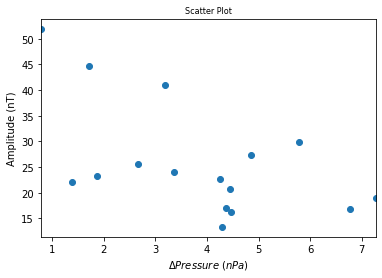

In [17]:
a1 = [item for item in a1 if not(math.isnan(item)) == True]
a2 = [item for item in a2 if not(math.isnan(item)) == True]
a3 = [item for item in a3 if not(math.isnan(item)) == True]
a4 = [item for item in a4 if not(math.isnan(item)) == True]
a5 = [item for item in a5 if not(math.isnan(item)) == True]
a6 = [item for item in a6 if not(math.isnan(item)) == True]
a7 = [item for item in a7 if not(math.isnan(item)) == True]
a8 = [item for item in a8 if not(math.isnan(item)) == True]
a9 = [item for item in a9 if not(math.isnan(item)) == True]
a10 = [item for item in a10 if not(math.isnan(item)) == True]
a11 = [item for item in a11 if not(math.isnan(item)) == True]
a12 = [item for item in a12 if not(math.isnan(item)) == True]
a13 = [item for item in a13 if not(math.isnan(item)) == True]
a14 = [item for item in a14 if not(math.isnan(item)) == True]
a15 = [item for item in a15 if not(math.isnan(item)) == True]
a16 = [item for item in a16 if not(math.isnan(item)) == True]
a17 = [item for item in a17 if not(math.isnan(item)) == True]
a18 = [item for item in a18 if not(math.isnan(item)) == True]
a19 = [item for item in a19 if not(math.isnan(item)) == True]
a20 = [item for item in a20 if not(math.isnan(item)) == True]
a21 = [item for item in a21 if not(math.isnan(item)) == True]

b1 = [item for item in b1 if not(math.isnan(item)) == True]
b2 = [item for item in b2 if not(math.isnan(item)) == True]
b3 = [item for item in b3 if not(math.isnan(item)) == True]
b4 = [item for item in b4 if not(math.isnan(item)) == True]
b5 = [item for item in b5 if not(math.isnan(item)) == True]
b6 = [item for item in b6 if not(math.isnan(item)) == True]
b7 = [item for item in b7 if not(math.isnan(item)) == True]
b8 = [item for item in b8 if not(math.isnan(item)) == True]
b9 = [item for item in b9 if not(math.isnan(item)) == True]
b10= [item for item in b10 if not(math.isnan(item)) == True]
b11= [item for item in b11 if not(math.isnan(item)) == True]
b12= [item for item in b12 if not(math.isnan(item)) == True]
b13 = [item for item in b13 if not(math.isnan(item)) == True]
b14 = [item for item in b14 if not(math.isnan(item)) == True]
b15 = [item for item in b15 if not(math.isnan(item)) == True]
b16 = [item for item in b16 if not(math.isnan(item)) == True]
b17 = [item for item in b17 if not(math.isnan(item)) == True]
b18 = [item for item in b18 if not(math.isnan(item)) == True]
b19 = [item for item in b19 if not(math.isnan(item)) == True]
b20 = [item for item in b20 if not(math.isnan(item)) == True]
b21 = [item for item in b21 if not(math.isnan(item)) == True]


med1 = np.median(a1)
med2 = np.median(a2)
med3 = np.median(a3)
med4 = np.median(a4)
med5 = np.median(a5)
med6 = np.median(a6)
med7 = np.median(a7)
med8 = np.median(a8)
med9 = np.median(a9)
med10 = np.median(a10)
med11 = np.median(a11)
med12= np.median(a12)
med13 = np.median(a13)
med14 = np.median(a14)
med15 = np.median(a15)
med16 = np.median(a16)
med17 = np.median(a17)
med18 = np.median(a18)
med19 = np.median(a19)
med20 = np.median(a20)
med21 = np.median(a21)


med1b = np.median(b1)
med2b = np.median(b2)
med3b = np.median(b3)
med4b = np.median(b4)
med5b = np.median(b5)
med6b = np.median(b6)
med7b = np.median(b7)
med8b = np.median(b8)
med9b = np.median(b9)
med10b = np.median(b10)
med11b= np.median(b11)
med12b= np.median(b12)
med13b = np.median(b13)
med14b = np.median(b14)
med15b = np.median(b15)
med16b = np.median(b16)
med17b = np.median(b17)
med18b = np.median(b18)
med19b = np.median(b19)
med20b = np.median(b20)
med21b = np.median(b21)

#removed the data from change 4 and 10 because they were NANs
changes1 = med1b - med1
changes2 = med2b - med2
changes3 = med3b - med3
changes4 = med4b - med4
changes5 = med5b - med5
changes6 = med6b - med6
changes7 = med7b - med7
changes8 = med8b - med8
changes9 = med9b - med9
changes10 = med10b - med10
changes11 = med11b - med11
changes12 = med12b - med12
changes13 = med13b - med13
changes14 = med14b - med14
changes15 = med15b - med15
changes16 = med16b - med16
changes17 = med17b - med17
changes18 = med18b - med18
changes19 = med19b - med19
changes20 = med20b - med20
changes21 = med21b - med21

changes1 = [changes1, changes2, changes3, changes6, changes7, changes8, changes9, changes12, changes13, changes14, changes15, changes17 ,changes18 ,changes19, changes20,changes21]
print(changes1)
plt.scatter(changes1, amplitude)
plt.title('Scatter Plot')
plt.ylabel('Amplitude (nT)')
plt.xlabel('$ \Delta Pressure$ (${nPa}$)')
plt.show

The polynomial has the equation 0 =          2
-0.6862 x + 17.38 x + 10.03
R² = 1671.57
chi² reduced =1.12
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


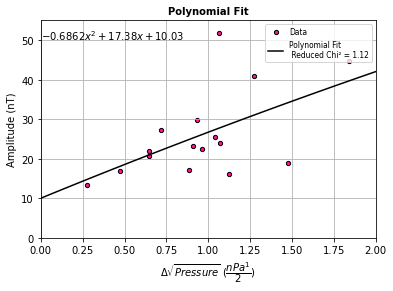

In [234]:
#plotting polynomial fit 
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

fig, ax = plt.subplots()
plt.rc('font', size=10)
plt.rc('axes', titlesize=10)

x = changes 
y = amplitude

x = np.array(x, dtype=float) 
y = np.array(y, dtype=float)


#making a model 
p = np.polyfit(x, y, 1)
n = y.size
m = p.size
dof = n - m

y_model = np.polyval(p, [x, y])
model = np.poly1d(np.polyfit(x, y, 2))
myline = np.linspace(0, 2, 100)
print(f'The polynomial has the equation 0 = {model}')
mymodel = model(myline)


#statistical analysis
y_bar = np.mean(y)
# Equation to find R²
R2 = np.sum((y_model - y_bar)**2) / np.sum((y - y_bar)**2)
print(f'R² = {R2:.2f}')
resid = y - y_model

#chi^2 and reduced chi^2
chi2 = np.sum((resid / y_model)**2)
chi2_red = chi2 / dof
print(f'chi² reduced ={chi2_red:.2f}')

# Standard deviation of the error
std = unp.std_devs(resid)
t_critical = stats.t.ppf(1 - (0.05 / 2), dof)

interval = t_critical*std
print(std)

xlim = plt.xlim(0,2)
ylim = plt.ylim(0,55)
plt.scatter(x, y, c='deeppink', marker='o', edgecolors='k', s=18, label=f'Data')
plt.plot(myline, mymodel ,c='k', label=r'Polynomial Fit''\n'f' Reduced Chi² = {chi2_red:.2f}')




ax.set_ylabel('Amplitude (nT)')
ax.set_xlabel('$ \Delta\sqrt{Pressure}$ ($\dfrac{nPa^1}{2}$)')
ax.set_title('Polynomial Fit',fontweight="bold")
ax.legend(fontsize =7.5, loc='upper right' )
ax.text(0,50,'$-0.6862x^2 + 17.38x + 10.03$')
ax.grid(True)


[14.84415182  0.56129707]
chi-squared statistic = 1254.90
reduced chi-squared = 89.64


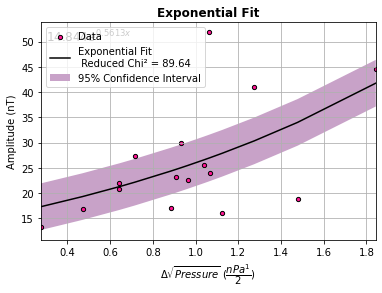

In [247]:
#plotting exponential fit
fig, ax = plt.subplots()
plt.rc('font', size=10)
plt.rc('axes', titlesize=12)
x=changes
y=amplitude

x = np.array(x, dtype=float) 
y = np.array(y, dtype=float)


def func(x, a, b):
    return (a * np.exp(b*x))

popt, pcov = curve_fit(func, x, y, p0=[15,0.5])
a, b = popt
print(popt)

def chi_squared_reduced(data, model, dof=None):
    sq_residual = (data - model)**2
    chi_sq = np.sum(sq_residual)
    if dof is None:
        return chi_sq
    else:
        nu = len(data) - dof
        return chi_sq / nu

# Define our data, model, uncertainty, and degrees of freedom
I_data = y.copy()  # observed data
I_modeled = func(x, *popt) # model fitted result

# Calculate the Chi-Squared value (no dof)
chisq = chi_squared_reduced(I_data, I_modeled)
print(f"chi-squared statistic = {chisq:1.2f}")

# Calculate the Reduced Chi-Squared value (with dof)
dof = 2  # We have two free parameters
rechisq = chi_squared_reduced(I_data, I_modeled, dof)
print(f"reduced chi-squared = {rechisq:1.2f}")

xlim = plt.xlim()
ylim = plt.ylim()
t = np.linspace(0, 2, 19)
ax.set_ylabel('Amplitude (nT)')
ax.set_xlabel('$ \Delta\sqrt{Pressure}$ ($\dfrac{nPa^1}{2}$)')
ax.set_title('Exponential Fit',fontweight="bold")
plt.scatter(x, y, c='deeppink', marker='o', edgecolors='k', s=18, label=f'Data')
plt.plot(x, func(x,*popt), c='k',label = r'Exponential Fit''\n'f' Reduced Chi² = {rechisq:.2f}')
plt.fill_between(x, func(x,*popt) + (1.96*std_err)/np.sqrt(len(y)), func(x,*popt) - (1.96*std_err)/np.sqrt(len(y)), facecolor='#C8A2C8', zorder=0,label=r'95% Confidence Interval')

ax.legend()
ax.text(0.3,50, '$14.844 e^{0.5613x}$', fontsize =12)
plt.grid(True)



10.680829376766084
15.949572726705675
The fitted straight line has equation y = 15.9x + 10.7
R² = 0.31
Reduced Chi^2 = 0.11
9.41830733891356
2.1447866879169273


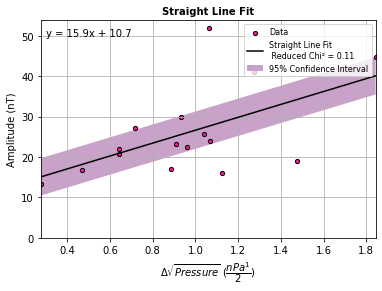

In [246]:
#plotting straight line fit 
fig, ax = plt.subplots()
plt.rc('font', size=10)
plt.rc('axes', titlesize=10)
x=changes
y=amplitude

x = np.array(x, dtype=float) 
y = np.array(y, dtype=float)

# fitting polynomial (1 means straight line)
p = np.polyfit(x, y, 1)
m = p[0]  
c = p[1]

print(c)
print(m)
print(f'The fitted straight line has equation y = {m:.1f}x {c:=+6.1f}')

n = y.size
m = p.size
dof = n - m
# Significance level
alpha = 0.05
# We're using a two-sided test
tails = 2
# The percent-point function (aka the quantile function) of the t-distribution
# gives you the critical t-value that must be met in order to get significance
t_critical = stats.t.ppf(1 - (alpha / tails), dof)
y_model = np.polyval(p, x)
#making model of 1-Dimensional polynomial 
model = np.poly1d(p)
y_model = model(x)

# Mean
y_bar = np.mean(y)
# Equation to find R²
R2 = np.sum((y_model - y_bar)**2) / np.sum((y - y_bar)**2)
print(f'R² = {R2:.2f}')

# Calculate the residual errors in data 
resid = y - y_model
# Chi^2 and reduced chi^2
chi2 = sum((resid / y_model)**2)
chi2_red = chi2 / dof
print(f'Reduced Chi^2 = {chi2_red:.2f}')

# Std of the error
std_err = np.sqrt(sum(resid**2) / dof)
print(std_err)
print(t_critical)
#plotting scatter, straight line and confidence interval 
plt.scatter(x, y, c='deeppink', marker='o', edgecolors='k', s=18, label=f'Data')
xlim = plt.xlim()
ylim = plt.ylim()
plt.plot(np.array(xlim), p[1] + p[0] * np.array(xlim),c='k', label=r'Straight Line Fit''\n'f' Reduced Chi² = {chi2_red:.2f}')

#confidence interval 
x_fitted = np.linspace(xlim[0], xlim[1], 100)
y_fitted = np.polyval(p, x_fitted)
ci = t_critical * std_err * np.sqrt(1 / n + (x_fitted - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
plt.fill_between(x_fitted, y_fitted + (1.96*std_err)/np.sqrt(len(y)), y_fitted - (1.96*std_err)/np.sqrt(len(y)), facecolor='#C8A2C8', zorder=0,label=r'95% Confidence Interval')
#print(ci)
#setting graph 
ax.set_ylabel('Amplitude (nT)')
ax.set_xlabel('$ \Delta\sqrt{Pressure}$ ($\dfrac{nPa^1}{2}$)')
ax.set_title('Straight Line Fit',fontweight="bold")
ax.legend(fontsize=8, loc='upper right')
ax.text(0.3,50, 'y = 15.9x + 10.7')
plt.ylim(0, ylim[1])
plt.grid(True)

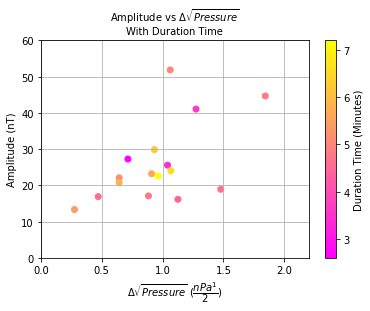

In [228]:
#trying for color bar 
fig, ax = plt.subplots()
plt.rc('font', size=10)
plt.rc('axes', titlesize=10)
duration = np.array(duration, dtype= float)
plt.scatter(changes, amplitude, c=duration, cmap='spring')
cbar=plt.colorbar()
cbar.set_label('Duration Time (Minutes)', rotation=90)

ax.set_ylabel('Amplitude (nT)')
ax.set_xlabel('$ \Delta\sqrt{Pressure}$ ($\dfrac{nPa^1}{2}$)')
ax.set_title(r'Amplitude vs $\Delta\sqrt{Pressure}$''\n'r'With Duration Time')
ax.set_ylim(0,60)
ax.set_xlim(0,2.2)
ax.grid(True)

[0.13, 0.17, 0.33, 1.0, 0.63, 0.17, 0.1, 0.07, 0.33, 1.0, 0.43, 0.03, 0.2, 0.33, 0.13, 0.9, 0.17, 0.1, 0.0, 0.03, 0.13]
[0.0, 0.07, 0.0, 0.34, 0.14, 0.14, 0.0, 0.07, 0.14, 0.34, 0.1, 0.03, 0.14, 0.17, 0.21, 0.21, 0.17, 0.07, 0.0, 0.0, 0.17]


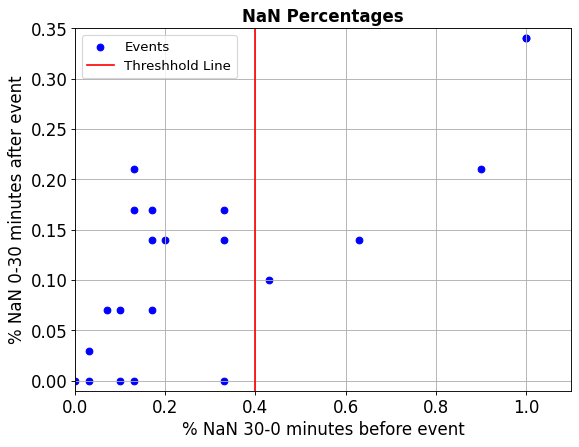

In [365]:
#percentage of NaNs per event before vs after 
a1 = pressure1[0:30] 
a2 = pressure2[0:30] 
a3 = pressure3[0:30] 
a4 = pressure4[0:30] 
a5= pressure5[0:30] 
a6= pressure6[0:30] 
a7= pressure7[0:30] 
a8= pressure8[0:30] 
a9= pressure9[0:30] 
a10= pressure10[0:30] 
a11= pressure11[0:30] 
a12= pressure12[0:30] 
a13= pressure13[0:30] 
a14= pressure14[0:30] 
a15= pressure15[0:30] 
a16= pressure16[0:30] 
a17= pressure17[0:30] 
a18= pressure18[0:30] 
a19= pressure19[0:30] 
a20= pressure20[0:30] 
a21= pressure21[0:30] 

nan = []
for i in (a1, a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21): 
    x = round(np.isnan(i).sum()/ len(i), 2)
    nan.append(x)
print(nan)

b1 = pressure1[31:60]
b2 = pressure2[31:60]
b3 = pressure3[31:60]
b4 = pressure4[31:60]
b5= pressure5[31:60]
b6= pressure6[31:60]
b7= pressure7[31:60]
b8= pressure8[31:60]
b9= pressure9[31:60]
b10= pressure10[31:60]
b11= pressure11[31:60]
b12= pressure12[31:60]
b13= pressure13[31:60]
b14= pressure14[31:60]
b15=pressure15[31:60]
b16= pressure16[31:60]
b17= pressure17[31:60]
b18= pressure18[31:60]
b19= pressure19[31:60]
b20= pressure20[31:60]
b21= pressure21[31:60]

nan1= []
for i in (b1, b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21): 
    x = round(np.isnan(i).sum()/ len(i), 2)
    nan1.append(x)
print(nan1)

duration1 = sc_2012['average_duration'].tolist()
#fig, ax = plt.subplots()
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
plt.scatter(nan, nan1, color='blue', label = 'Events')
plt.axvline(x = 0.4, color='r', linestyle='-', label = 'Threshhold Line')

plt.legend(fontsize =12, loc='best' )
plt.ylabel('% NaN 0-30 minutes after event')
plt.xlabel('% NaN 30-0 minutes before event')
plt.title('NaN Percentages',fontweight="bold")
plt.ylim(-0.01,0.35)
plt.xlim(0,1.1)
plt.grid(True)

-0.6861987795936302 17.379339082133328 10.034357305855615
R^2: 0.35499402466588503
Uncertainty
a: -1+/-12
b: 17+/-26
c: 10+/-13


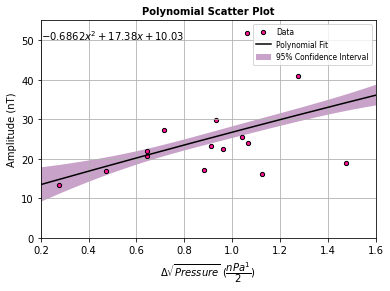

In [300]:
#using 95% interval from medium article 
#plotting polynomial fit 
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

fig, ax = plt.subplots()
plt.rc('font', size=10)
plt.rc('axes', titlesize=10)

x = changes 
y = amplitude

x = np.array(x, dtype=float) 
y = np.array(y, dtype=float)
n = len(y)

def f(x,a,b,c):
    return a*x**2 + b*x + c

popt, pcov = curve_fit(f,x,y)
a = popt[0]
b = popt[1]
c = popt[2]

print(a,b,c)
r2 = 1.0-(sum((y-f(x,a,b,c))**2)/((n-1.0)*np.var(y,ddof=2)))
print('R^2: ' + str(r2))

# calculate parameter confidence interval
a,b,c = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))
print('c: ' + str(c))

# plot data
plt.scatter(x, y,c='deeppink', s=18, edgecolor='k', label='Data')

# calculate regression confidence interval
px = np.linspace(0, 2, 500)
py = a*px**2 +b*px +c
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# plot the regression
plt.plot(px, nom, c='black', label='Polynomial Fit')


plt.fill_between(px, nom + (1.96*std)/np.sqrt(len(y)), nom - (1.96*std)/np.sqrt(len(y)), facecolor='#C8A2C8', zorder=0,label=r'95% Confidence Interval')

ax.set_ylim(0,55)
ax.set_xlim(0.2,1.6)
ax.set_ylabel('Amplitude (nT)')
ax.set_xlabel('$ \Delta\sqrt{Pressure}$ ($\dfrac{nPa^1}{2}$)')
ax.set_title('Polynomial Scatter Plot',fontweight="bold")
ax.legend(fontsize =7.5, loc='upper right' )
ax.text(0.2,50,'$-0.6862x^2 + 17.38x + 10.03$')
ax.grid(True)



-0.6861987795936302 17.379339082133328 10.034357305855615
R^2: 0.35499402466588503
Uncertainty
a: -1+/-12
b: 17+/-26
c: 10+/-13
[14.84413318  0.56129818]
chi-squared statistic = 1254.90
reduced chi-squared = 89.64


Text(0.0, 1.0, 'C)')

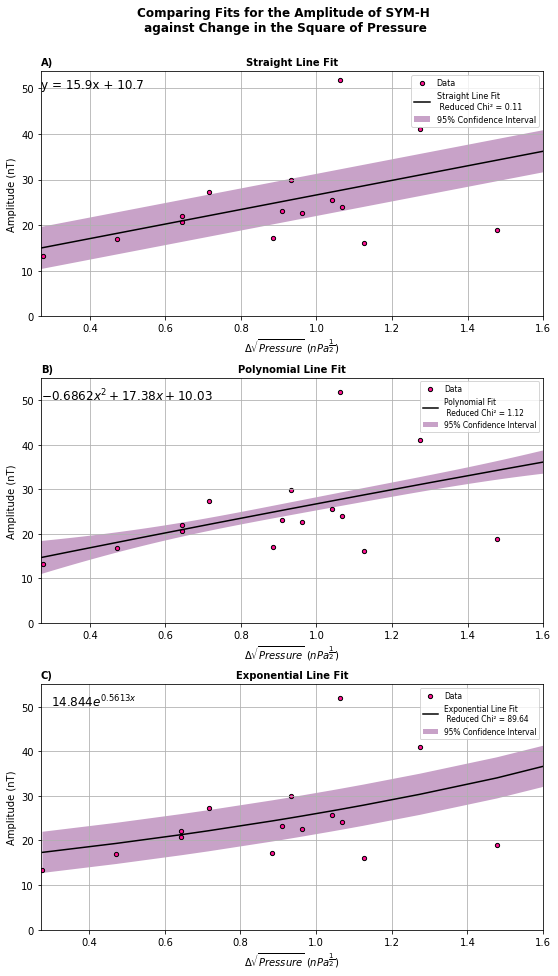

In [353]:
#making one figure of the three fits 
fig = plt.figure()
#setting the gridspec 
gs = fig.add_gridspec(3, 1, hspace=0.25, wspace=0.25)
plt.rc('font', size=10)
plt.rc('axes', titlesize=10)
fig.set_figheight(15)
fig.set_figwidth(9)

fig.tight_layout()
fig.subplots_adjust(top=0.92)

(ax1),(ax2),(ax3) = gs.subplots(sharex=False, sharey=False)
fig.suptitle(r'Comparing Fits for the Amplitude of SYM-H''\n'f' against Change in the Square of Pressure', fontweight="bold")

#data for the scatter plots
x = changes 
y = amplitude

x = np.array(x, dtype=float) 
y = np.array(y, dtype=float)

#plotting straight line fit
ax1.scatter(x, y, c='deeppink', marker='o', edgecolors='k', s=18, label=f'Data')
xlim = ax1.set_xlim(0.2,1.6)
ylim = ax1.set_ylim()
ax1.plot(np.array(xlim), p[1] + p[0] * np.array(xlim),c='k', label=r'Straight Line Fit''\n'f' Reduced Chi² = {chi2_red:.2f}')

#confidence interval 
x_fitted = np.linspace(xlim[0], xlim[1], 100)
y_fitted = np.polyval(p, x_fitted)
ci = t_critical * std_err * np.sqrt(1 / n + (x_fitted - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
ax1.fill_between(x_fitted, y_fitted + (1.96*std_err)/np.sqrt(len(y)), y_fitted - (1.96*std_err)/np.sqrt(len(y)), facecolor='#C8A2C8', zorder=0,label=r'95% Confidence Interval')

ax1.set_ylim(0,55)
ax1.set_xlim(0.27,1.6)
ax1.set_ylabel('Amplitude (nT)')
ax1.set_xlabel('$ \Delta\sqrt{Pressure}$ ($nPa^{\dfrac{1}{2}}$)')
ax1.set_title('Straight Line Fit',fontweight="bold")
ax1.legend(fontsize=8, loc='upper right')
ax1.text(0.27,50, 'y = 15.9x + 10.7',fontsize = 12)
ax1.set_ylim(0, ylim[1])
ax1.grid(True)

#plotting exponential fit
def f(x,a,b,c):
    return a*x**2 + b*x + c

popt, pcov = curve_fit(f,x,y)
a = popt[0]
b = popt[1]
c = popt[2]

print(a,b,c)
r2 = 1.0-(sum((y-f(x,a,b,c))**2)/((n-1.0)*np.var(y,ddof=2)))
print('R^2: ' + str(r2))

# calculate parameter confidence interval
a,b,c = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))
print('c: ' + str(c))


ax2.scatter(x, y,c='deeppink', s=18, edgecolor='k', label='Data')

# calculate regression confidence interval
px = np.linspace(0, 2, 500)
py = a*px**2 +b*px +c
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# plot the regression
ax2.plot(px, nom, c='black', label=r'Polynomial Fit''\n'f' Reduced Chi² = 1.12')


ax2.fill_between(px, nom + (1.96*std)/np.sqrt(len(y)), nom - (1.96*std)/np.sqrt(len(y)), facecolor='#C8A2C8', zorder=0,label=r'95% Confidence Interval')

ax2.set_ylim(0,55)
ax2.set_xlim(0.27,1.6)
ax2.set_ylabel('Amplitude (nT)')
ax2.set_xlabel('$ \Delta\sqrt{Pressure}$ ($nPa^{\dfrac{1}{2}}$)')
ax2.set_title('Polynomial Line Fit',fontweight="bold")
ax2.legend(fontsize =7.5, loc='upper right' )
ax2.text(0.27,50,'$-0.6862x^2 + 17.38x + 10.03$',fontsize = 12)
ax2.grid(True)

#plotting exponential fit 
def func(x, a, b):
    return (a * np.exp(b*x))

popt, pcov = curve_fit(func, x, y, p0=[12,0.2])
a, b = popt
print(popt)

def chi_squared_reduced(data, model, dof=None):
    sq_residual = (data - model)**2
    chi_sq = np.sum(sq_residual)
    if dof is None:
        return chi_sq
    else:
        nu = len(data) - dof
        return chi_sq / nu

# Define our data, model, uncertainty, and degrees of freedom
I_data = y.copy()  # observed data
I_modeled = func(x, *popt) # model fitted result

# Calculate the Chi-Squared value (no dof)
chisq = chi_squared_reduced(I_data, I_modeled)
print(f"chi-squared statistic = {chisq:1.2f}")

# Calculate the Reduced Chi-Squared value (with dof)
dof = 2  # We have two free parameters
rechisq = chi_squared_reduced(I_data, I_modeled, dof)
print(f"reduced chi-squared = {rechisq:1.2f}")

t = np.linspace(0, 2, 19)
ax3.set_ylabel('Amplitude (nT)')
ax3.set_xlabel('$ \Delta\sqrt{Pressure}$ ($nPa^{\dfrac{1}{2}}$)')
ax3.set_title('Exponential Line Fit',fontweight="bold")
ax3.scatter(x, y, c='deeppink', marker='o', edgecolors='k', s=18, label=f'Data')
ax3.plot(x, func(x,*popt), c='k',label = r'Exponential Line Fit''\n'f' Reduced Chi² = {rechisq:.2f}')
ax3.fill_between(x, func(x,*popt) + (1.96*std_err)/np.sqrt(len(y)), func(x,*popt) - (1.96*std_err)/np.sqrt(len(y)), facecolor='#C8A2C8', zorder=0,label=r'95% Confidence Interval')

ax3.set_ylim(0,55)
ax3.set_xlim(0.272,1.6)
ax3.legend(fontsize =7.5, loc='upper right' )
ax3.text(0.3,50, '$14.844 e^{0.5613x}$',fontsize = 12)
ax3.grid(True)

#setting labels a,b,c
ax1.set_title('A)', fontweight="bold", loc='left', fontsize='10')
ax2.set_title('B)', fontweight="bold", loc='left', fontsize='10')
ax3.set_title('C)', fontweight="bold", loc='left', fontsize='10')